# Maps

Connecting the Country names to ISO-3 codes to then map.

In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_f = '../data/canonical/participant-data.csv'
student_df = pd.read_csv(student_f)

country_f = '../data/canonical/country-counts.csv'
country_df = pd.read_csv(country_f)

outreach_f = '../data/canonical/outreach-programs.csv'
outreach_df = pd.read_csv(outreach_f)

In [3]:
map_f = '../data/maps/ne_50m_admin_0_countries.geojson'

map_df = gpd.read_file(map_f)
map_df.columns

Index(['abbrev', 'abbrev_len', 'adm0_a3', 'adm0_a3_is', 'adm0_a3_un',
       'adm0_a3_us', 'adm0_a3_wb', 'adm0_dif', 'admin', 'brk_a3', 'brk_diff',
       'brk_group', 'brk_name', 'continent', 'economy', 'featurecla',
       'fips_10', 'formal_en', 'formal_fr', 'gdp_md_est', 'gdp_year',
       'geometry', 'geou_dif', 'geounit', 'gu_a3', 'homepart', 'income_grp',
       'iso_a2', 'iso_a3', 'iso_n3', 'labelrank', 'lastcensus', 'level',
       'long_len', 'mapcolor13', 'mapcolor7', 'mapcolor8', 'mapcolor9', 'name',
       'name_alt', 'name_len', 'name_long', 'name_sort', 'note_adm0',
       'note_brk', 'pop_est', 'pop_year', 'postal', 'region_un', 'region_wb',
       'scalerank', 'sov_a3', 'sovereignt', 'su_a3', 'su_dif', 'subregion',
       'subunit', 'tiny', 'type', 'un_a3', 'wb_a2', 'wb_a3', 'wikipedia',
       'woe_id'],
      dtype='object')

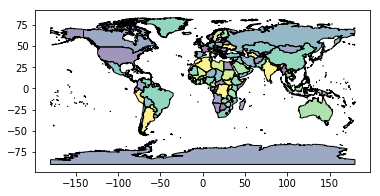

In [4]:
map_df.plot()

#### Merging Countries

Test and see if all the names are contained.

In [5]:
countries_canon = map_df.name_sort.unique().tolist()
countries_data = country_df.country.unique().tolist()

for i in countries_data:
    if (i in countries_canon) == False:
        print ("'{}' contained:\tFalse".format(i))

In [6]:
student_data = student_df.country.unique().tolist()

for i in student_data:
    if (i in countries_canon) == False:
        print ("'{}' contained:\tFalse".format(i))

In [7]:
# outreach data
outreach_data = outreach_df.country.unique().tolist()

for i in outreach_data:
    if (i in countries_canon) == False:
        print ("'{}' contained:\tFalse".format(i))

#### Plotting?

In [8]:
# Slim down and rename the Natural Earth 
map_df = map_df[['name_sort', 'geometry']]
map_df.columns = ['country', 'geometry']

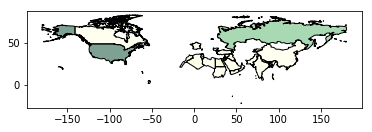

In [9]:
choro = map_df.merge(country_df, on='country')
choro.plot(column='count', cmap='YlGn');

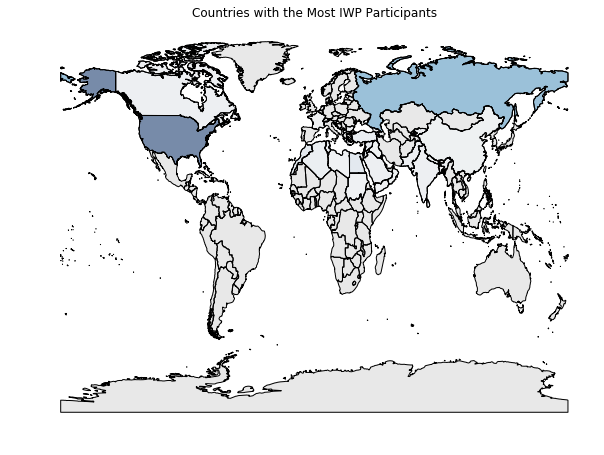

In [10]:
fig, ax = plt.subplots(1, figsize=(10,7.5))
base = map_df.plot(ax=ax, color='lightgray')
choro.plot(ax=base, column='count', cmap='Blues')

_ = ax.axis('off')
ax.set_title("Countries with the Most IWP Participants")

---

Student Plotting, points on map. E.g:

```
bank_points = df_banks[['lon', 'lat']].apply(lambda row: 
              Point(row["lon"], row["lat"]), axis=1)
geo_banks = gp.GeoDataFrame({"geometry": bank_points, 
			"bank_names": df_banks["bank_names"]})
```          

In [11]:
# Create data structure to plot student points
student_pts = student_df[['long', 'lat']].apply(lambda row: 
              Point(row["long"], row["lat"]), axis=1)
students_geo = gpd.GeoDataFrame({
    "geometry": student_pts,
    "name": student_df['first_name']
})

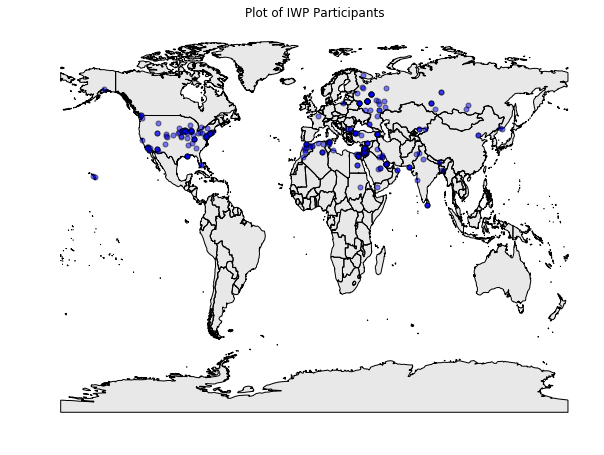

In [12]:
# Plot participants
fig, ax = plt.subplots(1, figsize=(10,7.5))
base = map_df.plot(ax=ax, color='lightgray')
students_geo.plot(ax=base, marker="o", 
             mfc="blue", markersize=5, 
             markeredgecolor="black", alpha=0.5)
_ = ax.axis('off')
ax.set_title("Plot of IWP Participants")

---

Plot the outreach programs as a choropleth.

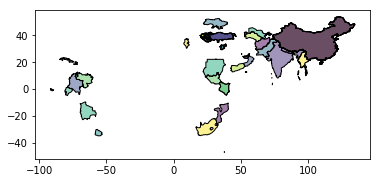

In [13]:
choro_outreach = map_df.merge(outreach_df, on='country')
choro_outreach.plot();

In [14]:
choro_outreach

,country,geometry,category,year,link
0,Afghanistan,"POLYGON ((74.89130859375001 37.231640625, 74.8...",Reading tour,2011,https://iwp.uiowa.edu/programs/reading-abroad/...
1,United Arab Emirates,(POLYGON ((53.92783203125001 24.17719726562498...,Reading tour,2011,https://iwp.uiowa.edu/programs/reading-abroad/...
2,United Arab Emirates,(POLYGON ((53.92783203125001 24.17719726562498...,Reading tour,2014,https://iwp.uiowa.edu/programs/reading-abroad/...
3,Armenia,(POLYGON ((45.55234375000006 40.61606445312506...,Reading tour,2014,https://iwp.uiowa.edu/programs/reading-abroad/...
4,Bahrain,"POLYGON ((50.60722656250002 25.88310546875, 50...",Distance Learning,2015,https://iwp.uiowa.edu/iwp-courses/distance-lea...
5,Bolivia,"POLYGON ((-58.159765625 -20.16464843750001, -5...",Reading tour,2011,http://iwp.uiowa.edu/programs/reading-abroad/2...
6,China,(POLYGON ((110.8887695312501 19.99194335937497...,International Conference,2009,https://iwp.uiowa.edu/programs/life-of-discove...
7,China,(POLYGON ((110.8887695312501 19.99194335937497...,International Conference,2010,https://iwp.uiowa.edu/programs/life-of-discove...
8,China,(POLYGON ((110.8887695312501 19.99194335937497...,International Conference,2011,https://iwp.uiowa.edu/programs/life-of-discove...
9,China,(POLYGON ((110.8887695312501 19.99194335937497...,International Conference,2012,https://iwp.uiowa.edu/programs/life-of-discove...
